In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from preprocessing import preprocess_data_exo2
from NLP_on_genres import transform_genres, is_there_nan_values


In [2]:
df = pd.read_csv('../data/Spotify_exo2.csv')
df.head()

features =  ['mode', 'acousticness', 'danceability', 'duration_ms', 'energy' ,'instrumentalness',
             'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key']

df_normal = df.drop('genres', axis=1)
print(f"Shape dataframe original :{df_normal.shape}")

df_normal_standardized = preprocess_data_exo2(df=df_normal, features_columns=features, z_score=True, standardize=True)
print(f"Shape dataframe original standardized without outliers :{df_normal_standardized.shape}")

df_genres = transform_genres(df=df, remove_genres_column=True)
print(f"Shape dataframe genres columns encoded:{df_genres.shape}")

df_genres_standardized = preprocess_data_exo2(df=df, features_columns=features, z_score=True, standardize=True)
df_genres_standardized = transform_genres(df_genres_standardized, remove_genres_column=True)
print(f"Shape dataframe genres columns encoded standardized without outliers:{df_genres_standardized.shape}")

Shape dataframe original :(2973, 13)
------------------------------------------
            Preprocessing data exo2           
------------------------------------------
Get dataset
------------------------------------------
Extract inputs ...
Shape of the data to process : (2973, 13)
Remove outliers with zscore ...
Center and reduce inputs ...
------------------------------------------
Data shape after preprocessing : (2885, 13)
Return dataset(s) ...
Preprocessing finished
------------------------------------------
Shape dataframe original standardized without outliers :(2885, 13)
Shape dataframe genres columns encoded:(2972, 1645)
------------------------------------------
            Preprocessing data exo2           
------------------------------------------
Get dataset
------------------------------------------
Extract inputs ...
Shape of the data to process : (2973, 14)
Remove outliers with zscore ...
Center and reduce inputs ...
------------------------------------------
Data s

In [17]:
from sklearn import model_selection
from sklearn.linear_model import ElasticNet, Ridge, Lasso

def compute_rmse_ridge_lasso(df, target, lam_list, ridge=True, scoring='neg_root_mean_squared_error'):
    X = df.drop(target, axis=1)
    y = df[target]

    scores = np.zeros(len(lam_list))

    kfold = model_selection.KFold(n_splits=10, random_state=7)

    for i, lam in enumerate(lam_list):
        if ridge:
            regr = Ridge(lam)
        else:
            regr = Lasso(lam)
        scores[i] = -np.mean(model_selection.cross_val_score(regr, X, y, cv=kfold, scoring=scoring))

    return scores

def plot_rmse_vs_lambda(lambda_list, rmse_list, title):
    figure = plt.figure(figsize=(5,5))
    plt.plot(lambda_list, rmse_list)
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('RMSE')
    plt.suptitle(title)
    plt.grid()
    plt.show()

def best_worst_features(lambda_list, rmse_list, df, target):

    X = df.drop(target, axis=1)
    y = df[target]

    best_lambda = lambda_list[np.argmin(rmse_list)]
    ridge = Ridge(alpha=best_lambda)
    ridge.fit(X, y)

    # Variables corresponding to the 10 highest coefficients and the 10 lowest coefficients
    coef = pd.Series(ridge.coef_, index =X.columns)

    imp_coef = pd.concat([coef.sort_values().head(5),
                         coef.sort_values().tail(5)])

    matplotlib.rcParams['figure.figsize'] = (4.0, 5.0)
    imp_coef.plot(kind = "barh")
    plt.title("Coefficients in the Ridge Model")
    plt.show()

In [12]:
lam_list = np.logspace(0, 4, 50, dtype=np.int)

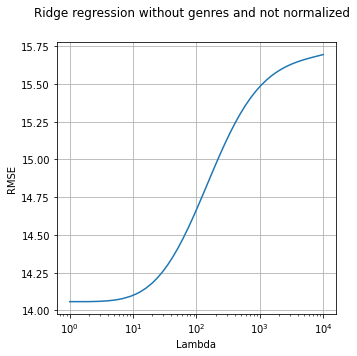

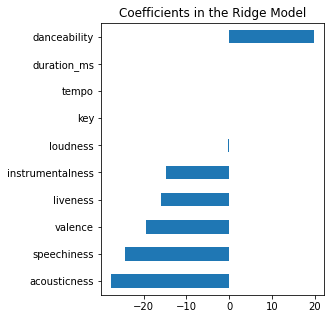

In [18]:
normal_rmse = compute_rmse_ridge_lasso(df_normal, target='popularity', lam_list=lam_list, ridge=True)
plot_rmse_vs_lambda(lam_list, normal_rmse, 'Ridge regression without genres and not normalized')
best_worst_features(lam_list, normal_rmse, df_normal, 'popularity')

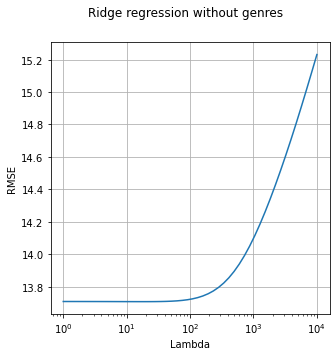

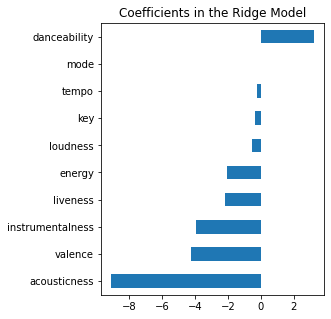

In [19]:
normal_std_rmse = compute_rmse_ridge_lasso(df_normal_standardized, target='popularity', lam_list=lam_list, ridge=True)
plot_rmse_vs_lambda(lam_list, normal_std_rmse, 'Ridge regression without genres')
best_worst_features(lam_list, normal_std_rmse, df_normal_standardized, 'popularity')


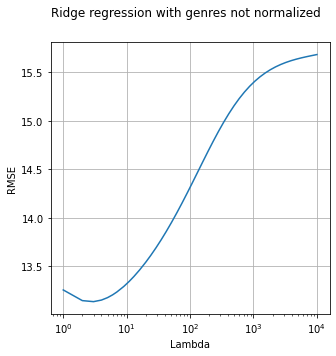

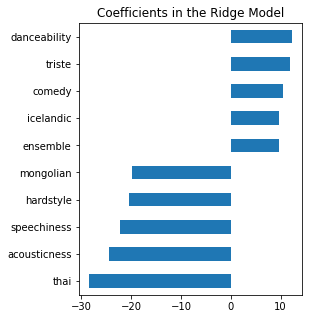

In [20]:
genres_rmse = compute_rmse_ridge_lasso(df_genres, target='popularity', lam_list=lam_list, ridge=True)
plot_rmse_vs_lambda(lam_list, genres_rmse, 'Ridge regression with genres not normalized')
best_worst_features(lam_list, genres_rmse, df_genres, 'popularity')


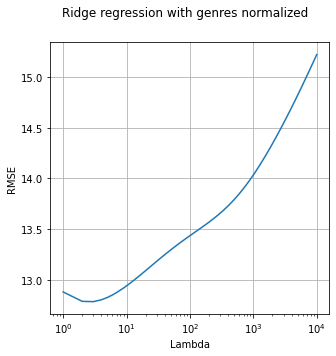

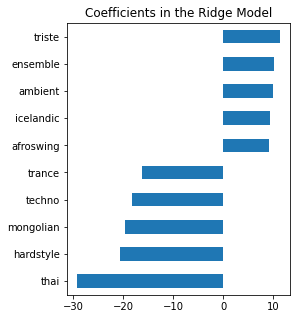

In [21]:
genres_std_rmse = compute_rmse_ridge_lasso(df_genres_standardized, target='popularity', lam_list=lam_list, ridge=True)
plot_rmse_vs_lambda(lam_list, genres_std_rmse, 'Ridge regression with genres normalized')
best_worst_features(lam_list, genres_std_rmse, df_genres_standardized, 'popularity')
